# Overview of `mobile-env:smart-city` for Smart City Simulation and Digital Twin Synchronization

`mobile-env:smart-city` is an open-source Python environment designed for simulating decentralized Metaverse environments. It provides a flexible and extendable platform for experimenting resource optimization with reinforcement learning (RL) and control algorithms in dynamic environments.

By enabling simulations with moving users, stationary sensors, and flexible configurations, `mobile-env:smart-city` allows the users to model realistic scenarios, assess the efficiency of resource utilization and fine-tune algorithms for real-time synchronization between a digital twin and the actual environment.

## Key Features of `mobile-env:smart-city`

* **Flexibility and Customizability**:
   - `mobile-env:smart-city` is written entirely in Python, making it easy to modify and extend.
   - The environment allows the simulation of a smart city scenario with mobile users (UEs), stationary sensors and a single base station (BS).
   - The number of UEs, sensors, their movement patterns, communication properties and the structure of the network can all be customized to suit a variety of experimental needs.

* **Compatibility with Gymnasium**:
   - `mobile-env:smart-city` adheres to the [Gymnasium](https://gymnasium.farama.org/) (formerly [OpenAI Gym](https://gym.openai.com/)) interface. This ensures compatibility with most reinforcement learning libraries and frameworks, allowing users to experiment with different RL algorithms with minimal integration effort.
   - Using the Gymnasium interface allows easy integration with popular RL libraries such as Stable-Baselines3, RLlib, or custom-built agents.

* **Not Limited to RL**:
   - While the environment is designed with RL in mind, `mobile-env:smart-city` is not restricted to RL algorithms. It can also be used to implement and test conventional control policies or simple rule-based benchmark algorithms. This flexibility enables users to benchmark RL algorithms against traditional approaches.

* **Realistic Network Simulation**:
   - The environment includes realistic simulations of mobile user equipment (UEs), cellular network base stations (BS) and sensors. 
   - UEs move dynamically and their communication quality (e.g., signal-to-noise ratio) changes based on their position relative to the base station. 
   - The scenarios are focused on exploring dynamic resource allocation in cellular networks for smart city applications.

* **Extensibility**:
   - Developers can easily extend the functionality of `mobile-env:smart-city` by modifying or adding custom observation spaces, action spaces or reward functions.
   - It allows simulation of dynamic scenarios, for example, by implementing custom movement patterns for UEs, different scheduling policies for base stations or adding new types of observations and rewards based on the needs of the experiment.

## Use Case for `mobile-env:smart-city`

This environment provides a platform for testing and evaluating resource allocation strategies, network control algorithms and Metaverse-related optimizations in a smart city environment. Reinforcement learning agents can be trained and evaluated in the environment to dynamically manage resources such as bandwidth and computational power for multiple devices and sensors. 

Its flexibility, ease of use and compatibility with Gymnasium make it an ideal tool for working on smart city or decentralized Metaverse applications.

## Customized gymnasium environment: `mobile-env:smart-city`

**Demonstration Steps:**

This demonstration consists of the following steps:

1. Installation and usage of `mobile-env:smart-city` with dummy actions
2. Configuration of `mobile-env:smart-city` and adjustment of the observation space

In additional notebooks within this project, you will find implementations of both a baseline scenario and a reinforcement learning (RL) approach for comparison. 

- The **baseline scenario** employs fixed policy splits and conventional control methods to allocate resources, providing a straightforward comparison point for evaluating the benefits of RL. 
- The **RL approach**, on the other hand, uses dynamic decision-making to optimize resource allocation in response to changing network conditions. 

By examining these two approaches side by side, we can assess the effectiveness and adaptability of RL algorithms over traditional static policies, providing insights into their potential for complex, dynamic environments like smart cities.

### Step 1: Installation and usage of `mobile-env:smart-city`

#### Importing necessary libraries:

- `gymnasium` is the core framework for creating and using custom environments
- `mobile_env` is the custom environment that we're demonstrating
- `matplotlib` is used for visualizing the environment's state

In [1]:
# Step 1: Import necessary libraries
import gymnasium as gym

# importing mobile_env automatically registers the predefined scenarios in Gym
import mobile_env

In [2]:
# predefined smart city scenario
from mobile_env.scenarios.smart_city import MComSmartCity

# easy access to the default smart city configuration, parameters and settings
MComSmartCity.default_config()

{'width': 200,
 'height': 200,
 'EP_MAX_TIME': 100,
 'seed': 111,
 'reset_rng_episode': False,
 'arrival': mobile_env.core.arrival.NoDeparture,
 'channel': mobile_env.core.channels.OkumuraHata,
 'scheduler': mobile_env.core.schedules.ResourceFair,
 'movement': mobile_env.core.movement.RandomWaypointMovement,
 'utility': mobile_env.core.utilities.BoundedLogUtility,
 'sensor_placement': mobile_env.core.sensor_placement.SensorPlacement,
 'handler': mobile_env.handlers.smart_city_handler.MComSmartCityHandler,
 'bs': {'bw': 100000000.0,
  'freq': 3500,
  'tx': 40,
  'height': 40,
  'computational_power': 100},
 'ue': {'velocity': 1.5, 'snr_tr': 2e-08, 'noise': 1e-09, 'height': 1.5},
 'sensor': {'height': 1.5, 'snr_tr': 2e-08, 'noise': 1e-09},
 'ue_job': {'job_generation_probability': 0.7,
  'communication_job_lambda_value': 100.0,
  'computation_job_lambda_value': 10.0},
 'sensor_job': {'communication_job_lambda_value': 120.0,
  'computation_job_lambda_value': 15.0},
 'e2e_delay_threshold':

#### Environment Registration

In Gymnasium, registering a new environment is essential when defining a custom environment that can be accessed easily and used with various reinforcement learning frameworks.

In [3]:
from gymnasium.envs.registration import register

# Register the new environment
register(
    id='mobile-smart_city-smart_city_handler-v0',
    entry_point='mobile_env.scenarios.smart_city:MComSmartCity',
    kwargs={'config': {}, 'render_mode': None}
)

/Users/elifohri/Library/Python/3.9/lib/python/site-packages/gymnasium/envs/registration.py:693: UserWarning: WARN: Overriding environment mobile-smart_city-smart_city_handler-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


In [4]:
# List all registered environments
env_specs = gym.envs.registry.keys()
print(f"Env specs: {env_specs}")

# Verify if specific environment is listed
assert 'mobile-smart_city-smart_city_handler-v0' in env_specs, "Environment not registered correctly"
print("Environment 'mobile-smart_city-smart_city_handler-v0' registered successfully!")

Env specs: dict_keys(['CartPole-v0', 'CartPole-v1', 'MountainCar-v0', 'MountainCarContinuous-v0', 'Pendulum-v1', 'Acrobot-v1', 'CartPoleJax-v0', 'CartPoleJax-v1', 'PendulumJax-v0', 'LunarLander-v2', 'LunarLanderContinuous-v2', 'BipedalWalker-v3', 'BipedalWalkerHardcore-v3', 'CarRacing-v2', 'Blackjack-v1', 'FrozenLake-v1', 'FrozenLake8x8-v1', 'CliffWalking-v0', 'Taxi-v3', 'Jax-Blackjack-v0', 'Reacher-v2', 'Reacher-v4', 'Pusher-v2', 'Pusher-v4', 'InvertedPendulum-v2', 'InvertedPendulum-v4', 'InvertedDoublePendulum-v2', 'InvertedDoublePendulum-v4', 'HalfCheetah-v2', 'HalfCheetah-v3', 'HalfCheetah-v4', 'Hopper-v2', 'Hopper-v3', 'Hopper-v4', 'Swimmer-v2', 'Swimmer-v3', 'Swimmer-v4', 'Walker2d-v2', 'Walker2d-v3', 'Walker2d-v4', 'Ant-v2', 'Ant-v3', 'Ant-v4', 'Humanoid-v2', 'Humanoid-v3', 'Humanoid-v4', 'HumanoidStandup-v2', 'HumanoidStandup-v4', 'GymV21Environment-v0', 'GymV26Environment-v0', 'mobile-smart_city-smart_city_handler-v0'])
Environment 'mobile-smart_city-smart_city_handler-v0' reg

### Step 2: Extending `mobile-env:smart-city` and tracking custom metrics

`mobile-env:smart-city` allows to define and track custom metrics during the training and testing phases in reinforcement learning (RL). This is essential for evaluating and understanding how well RL agents and different baseline policies perform in a decentralized smart city scenario.

It defines an interface for metrics that record values per user equipment and per sensor (e.g. utility per device), basestation (e.g. number of connections per station) or time step (e.g. average utility of device).

**The following key performance indicators (KPIs) are monitored:**

- **Number of connections:** Tracks the total number of active user and sensor connections in the network.
- **Utility metrics:** Measures the utility of user equipments (UEs) and sensors in terms of network performance.
- **Distance to base stations:** Monitors how far UEs and sensors are from the base station, which is essential to understand their connectivity strength.
- **Signal-to-Noise Ratio (SNR):** Measures the quality of the connection between UEs/sensors and base stations.
- **Throughput:** Calculates the data transfer rate for UEs and sensors, as well as for the base station.
- **Bandwidth and computational resource utilization:** Monitors how much of the available bandwidth and computational power is being used by UEs and sensors.

Later, we load the monitored metrics as `pandas` data frames.

#### Environment Creation

Create the simulation environment using the `make()` function, which instantiates the "smart-city" scenario with the configuration specified by the config parameter.

In [5]:
# create a small mobile environment for a single, centralized control agent
# pass rgb_array as render mode so the env can be rendered inside the notebook
env = gym.make("mobile-smart_city-smart_city_handler-v0", render_mode="rgb_array")


print(f"\nSmart city environment with {env.NUM_USERS} users, {env.NUM_SENSORS} sensors and {env.NUM_STATIONS} cells.")


Smart city environment with 10 users, 15 sensors and 1 cells.


#### Environment Data

In [6]:
obs, info = env.reset()
print("obs:", obs)
print("info:", info)

print("\nMetadata")
print("metadata:", env.metadata)

print("\nRender Modes")
print("render modes:", env.render_mode)

print("\nSpec:")
print("spec:", env.spec)

print("\nAction Space")
print("action space:", env.action_space)
print("action space shape:", env.action_space.shape)
print("simple action:", env.action_space.sample())

print("\nObservation Space")
print("observation space:", env.observation_space)
print("observation space shape:", env.observation_space.shape)
print("simple observation:", env.observation_space.sample())

print("\nReward Range")
print("reward range:", env.reward_range)


obs: [0. 0.]
info: {'time': 0.0, 'timestep reward ': 0.0, 'total reward': 0.0, 'total UE jobs generated': 0, 'total sensor jobs generated': 0, 'total UE jobs served': 0.0, 'total sensor jobs served': 0.0, 'total UE jobs delayed': 0.0, 'total sensor jobs delayed': 0.0, 'cumulative transmission throughput ue': 0.0, 'cumulative transmission throughput sensor': 0.0, 'cumulative processed data ue': 0.0, 'cumulative processed data sensor': 0.0, 'total episode processed throughput ue': 0.0, 'total episode processed throughput sensor': 0.0, 'avg e2e delay': 0.0, 'avg synchronization delay': 0.0, 'bs trans. ue size': {0: 0}, 'bs trans. ss size': {0: 0}, 'bs accomp. ue size': {0: 0}, 'bs accomp. ss size': {0: 0}}

Metadata
metadata: {'render_modes': ['rgb_array', 'human']}

Render Modes
render modes: rgb_array

Spec:
spec: EnvSpec(id='mobile-smart_city-smart_city_handler-v0', entry_point='mobile_env.scenarios.smart_city:MComSmartCity', reward_threshold=None, nondeterministic=False, max_episode_s

In [7]:
env.default_config()

{'width': 200,
 'height': 200,
 'EP_MAX_TIME': 100,
 'seed': 111,
 'reset_rng_episode': False,
 'arrival': mobile_env.core.arrival.NoDeparture,
 'channel': mobile_env.core.channels.OkumuraHata,
 'scheduler': mobile_env.core.schedules.ResourceFair,
 'movement': mobile_env.core.movement.RandomWaypointMovement,
 'utility': mobile_env.core.utilities.BoundedLogUtility,
 'sensor_placement': mobile_env.core.sensor_placement.SensorPlacement,
 'handler': mobile_env.handlers.smart_city_handler.MComSmartCityHandler,
 'bs': {'bw': 100000000.0,
  'freq': 3500,
  'tx': 40,
  'height': 40,
  'computational_power': 100},
 'ue': {'velocity': 1.5, 'snr_tr': 2e-08, 'noise': 1e-09, 'height': 1.5},
 'sensor': {'height': 1.5, 'snr_tr': 2e-08, 'noise': 1e-09},
 'ue_job': {'job_generation_probability': 0.7,
  'communication_job_lambda_value': 100.0,
  'computation_job_lambda_value': 10.0},
 'sensor_job': {'communication_job_lambda_value': 120.0,
  'computation_job_lambda_value': 15.0},
 'e2e_delay_threshold':

### Step 3: Demo with Dummy Actions

Episode 1
Step: {'time': 0.0, 'timestep reward ': 0, 'total reward': 0.0, 'total UE jobs generated': 78, 'total sensor jobs generated': 165, 'total UE jobs served': 0.0, 'total sensor jobs served': 0.0, 'total UE jobs delayed': 0.0, 'total sensor jobs delayed': 0.0, 'cumulative transmission throughput ue': 782.81993465151, 'cumulative transmission throughput sensor': 109.27952558993414, 'cumulative processed data ue': 0.0, 'cumulative processed data sensor': 0.0, 'total episode processed throughput ue': 0.0, 'total episode processed throughput sensor': 0.0, 'avg e2e delay': 0.0, 'avg synchronization delay': 0.0, 'bs trans. ue size': {0: 5}, 'bs trans. ss size': {0: 0}, 'bs accomp. ue size': {0: 0}, 'bs accomp. ss size': {0: 0}, 'number UE connections': 10, 'number sensor conncections': 15, 'mean utility': 0.9690327708810542, 'mean utility sensor': 0.4290777349139559, 'mean datarate': 93.72425999643585, 'mean datarate sensor': 7.285301706095609, 'bw allocation UE': 0.9, 'bw allocation s

KeyboardInterrupt: 

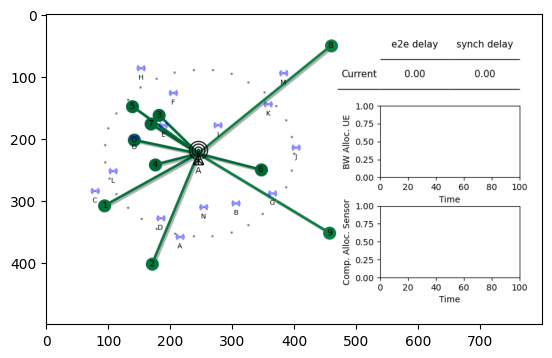

In [8]:
from IPython import display
import matplotlib.pyplot as plt

done = False
obs, info = env.reset()

for episode in range(10):
    print(f"Episode {episode}")
    done = False
    obs, info = env.reset(seed=42)
    
    for step in range(10):
        # here, use random dummy actions by sampling from the action space
        #dummy_action = env.action_space.sample()
        dummy_action = (0.9, 0.9)
        obs, reward, terminated, truncated, info = env.step(dummy_action)
        print(f"Step: {info}")

        # render the environment
        plt.imshow(env.render())
        display.display(plt.gcf())
        display.clear_output(wait=True)
    
plt.close()

In [ ]:
# load all tracked results as pandas data frames
scalar_results, performance_results, system_results, ue_results, bs_results, ss_results = env.monitor.load_results()

# show general results
scalar_results

In [ ]:
performance_results

In [ ]:
system_results

In [ ]:
ue_results

In [ ]:
ss_results

In [ ]:
bs_results

In [ ]:
import matplotlib.pyplot as plt

def plot_ue_metrics(ue_results):
    required_metrics = ["user queue size"]
    available_metrics = [metric for metric in ue_results.columns if metric in required_metrics]

    for metric in available_metrics:
        plt.figure(figsize=(12, 8))
        
        for ue_id in ue_results.index.get_level_values("UE ID").unique():
            ue_data = ue_results.xs(ue_id, level="UE ID")[metric]
            plt.plot(ue_data.index, ue_data.values, label=f"UE {ue_id}")
            
        plt.title(f"UE Metric: {metric.capitalize()}", fontsize=16)
        plt.xlabel("Time Step", fontsize=14)
        plt.ylabel(metric.capitalize(), fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

plot_ue_metrics(ue_results)

In [ ]:
import matplotlib.pyplot as plt

def plot_sensor_metrics(ss_results):
    required_metrics = ["sensor queue size"]
    available_metrics = [metric for metric in ss_results.columns if metric in required_metrics]

    for metric in available_metrics:
        plt.figure(figsize=(12, 8))
        
        for sensor_id in ss_results.index.get_level_values("Sensor ID").unique():
            sensor_data = ss_results.xs(sensor_id, level="Sensor ID")[metric]
            plt.plot(sensor_data.index, sensor_data.values, label=f"Sensor {sensor_id}")
        
        plt.title(f"Sensor Metric: {metric.capitalize()}", fontsize=16)
        plt.xlabel("Time Step", fontsize=14)
        plt.ylabel(metric.capitalize(), fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

plot_sensor_metrics(ss_results)

In [ ]:
import matplotlib.pyplot as plt

def plot_bs_metrics():
    # Plot scalar metrics
    for metric in bs_results.columns:
        plt.figure(figsize=(12, 8))
        bs_results[metric].plot()
        plt.title(f"{metric}")
        plt.xlabel("Time Step")
        plt.ylabel("Value")
        plt.grid(True)
        plt.show()

plot_bs_metrics()

In [ ]:
import matplotlib.pyplot as plt

def plot_performance_metrics():
    # Plot performance metrics
    for metric in performance_results.columns:
        plt.figure(figsize=(12, 8))
        performance_results[metric].plot()
        plt.title(f"{metric}")
        plt.xlabel("Time Step")
        plt.ylabel("Value")
        plt.grid(True)
        plt.show()

plot_performance_metrics()

In [ ]:
import matplotlib.pyplot as plt

def plot_system_metrics():
    # Plot system metrics
    for metric in system_results.columns:
        plt.figure(figsize=(12, 8))
        system_results[metric].plot()
        plt.title(f"{metric}")
        plt.xlabel("Time Step")
        plt.ylabel("Value")
        plt.grid(True)
        plt.show()

plot_system_metrics()

In [ ]:
import matplotlib.pyplot as plt

def plot_all_ue_metrics(ue_results):
    for metric in ue_results.columns:
        plt.figure(figsize=(12, 8))
        
        for ue_id in ue_results.index.get_level_values("UE ID").unique():
            ue_data = ue_results.xs(ue_id, level="UE ID")[metric]
            plt.plot(ue_data.index, ue_data.values, label=f"UE {ue_id}")
        
        plt.title(f"Metric: {metric}", fontsize=16)
        plt.xlabel("Time Step", fontsize=14)
        plt.ylabel(metric, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

#plot_all_ue_metrics(ue_results)

In [ ]:
import matplotlib.pyplot as plt

def plot_all_sensor_metrics(ss_results):
    for metric in ss_results.columns:
        plt.figure(figsize=(12, 8))
    
        for sensor_id in ss_results.index.get_level_values("Sensor ID").unique():
            sensor_data = ss_results.xs(sensor_id, level="Sensor ID")[metric]
            plt.plot(sensor_data.index, sensor_data.values, label=f"Sensor {sensor_id}")
        
        plt.title(f"Sensor Metric: {metric}", fontsize=16)
        plt.xlabel("Time Step", fontsize=14)
        plt.ylabel(metric, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

#plot_all_sensor_metrics(ss_results)